In [1]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import model_from_json
from sklearn.metrics import classification_report, accuracy_score

In [2]:
dataset_path = "DATASET/train"

labels_map = {
    '1': 'surprise',
    '2': 'fear',
    '3': 'disgust',
    '4': 'happy',
    '5': 'sad',
    '6': 'angry',
    '7': 'neutral'
}

image_size = 48  
num_classes = len(labels_map)

In [3]:
def load_data(dataset_path):
    images = []
    labels = []
    for folder_name, emotion in labels_map.items():
        folder_path = os.path.join(dataset_path, folder_name)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, (image_size, image_size))
            img = img.astype('float32') / 255.0
            images.append(img)
            labels.append(list(labels_map.keys()).index(folder_name))
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [4]:
X, y = load_data(dataset_path) 

X_train, X_val, y_train_indices, y_val_indices = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

num_classes = 7
y_train = to_categorical(y_train_indices, num_classes=num_classes)
y_val = to_categorical(y_val_indices, num_classes=num_classes)


In [5]:
def create_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(image_size, image_size,1)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [6]:
model = create_model()

e:\kinshu\envs\cv_project\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_val, y_val),
    shuffle=True
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.3791 - loss: 1.6698 - val_accuracy: 0.4004 - val_loss: 1.5890
Epoch 2/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.4330 - loss: 1.5114 - val_accuracy: 0.5503 - val_loss: 1.2826
Epoch 3/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.5577 - loss: 1.2401 - val_accuracy: 0.5963 - val_loss: 1.1174
Epoch 4/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6137 - loss: 1.0893 - val_accuracy: 0.6448 - val_loss: 0.9804
Epoch 5/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.6393 - loss: 1.0094 - val_accuracy: 0.6668 - val_loss: 0.9323
Epoch 6/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.6643 - loss: 0.9552 - val_accuracy: 0.6790 - val_loss: 0.8898
Epoch 7/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.6876 - loss: 0.8965 - val_accuracy: 0.6978 - val_loss: 0.8518
Epoch 8/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.6957 - loss: 0.8577 - val_ac

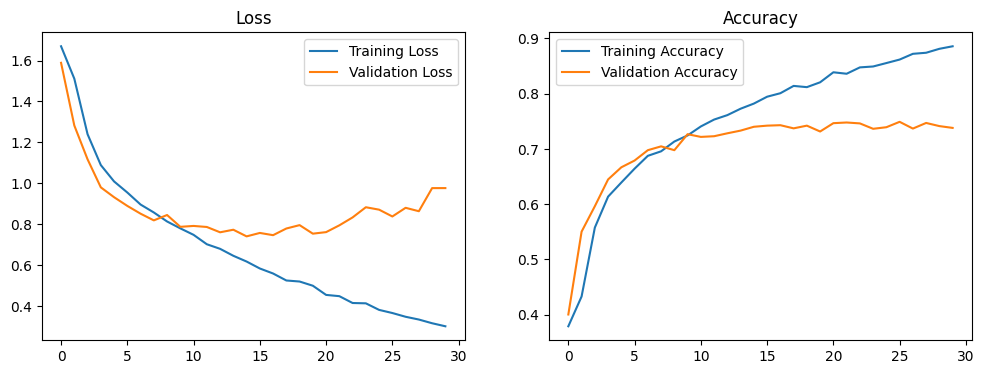

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

In [9]:
model_json = model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("emotion_model_weights.h5")

print("Model saved as 'emotion_model.json' and weights as 'emotion_model_weights.h5'.")

ValueError: The filename must end in `.weights.h5`. Received: filepath=emotion_model_weights.h5

In [ ]:

test_images_folder = r'DATASET\test'
model_json_path = 'emotion_model.json'
model_weights_path = 'emotion_model_weights.h5'


emotion_labels = ['surprise', 'fear', 'disgust', 'happy', 'sad', 'angry', 'neutral']
image_size = 48

print("Loading model from disk...")
try:
    with open(model_json_path, 'r') as json_file:
        loaded_model_json = json_file.read()

    emotion_model = model_from_json(loaded_model_json)
    emotion_model.load_weights(model_weights_path)
    emotion_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print("Model loaded and compiled successfully.\n")

except FileNotFoundError as e:
    print(f"Error loading model files: {e}")
    print("Please ensure 'emotion_model.json' and 'emotion_model_weights.h5' are in the correct directory.")
    exit()


def preprocess_image(img_path):
    """Loads, grayscales, resizes, and normalizes an image for the model."""
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Image not found or cannot be read: {img_path}")
    
    img = cv2.resize(img, (image_size, image_size))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=-1) 
    img = np.expand_dims(img, axis=0)    
    return img

y_true = []
y_pred = []

print(f"Processing images from '{test_images_folder}'...\n")

label_folders = os.listdir(test_images_folder)

for folder_name in label_folders:
    try:
        true_label_index = int(folder_name) - 1
        
        if not (0 <= true_label_index < len(emotion_labels)):
            print(f"Skipping folder '{folder_name}': Name is not a valid label index.")
            continue
            
        true_label_str = emotion_labels[true_label_index]
        label_folder_path = os.path.join(test_images_folder, folder_name)

        if not os.path.isdir(label_folder_path):
            continue 

        print(f"--- Processing folder '{folder_name}' (Label: {true_label_str}) ---")
        
        for img_name in os.listdir(label_folder_path):
            img_path = os.path.join(label_folder_path, img_name)
            
            try:
                processed_img = preprocess_image(img_path)
                prediction = emotion_model.predict(processed_img, verbose=0)
                predicted_index = np.argmax(prediction)
                predicted_label_str = emotion_labels[predicted_index]
                
                y_true.append(true_label_str)
                y_pred.append(predicted_label_str)

            except Exception as e:
                print(f"An error occurred while processing '{img_name}': {e}")

    except ValueError:
        print(f"Skipping folder '{folder_name}': Name is not a number.")
    except Exception as e:
        print(f"An unexpected error occurred with folder '{folder_name}': {e}")


print(f"\nTotal test images processed: {len(y_true)}")

if len(y_true) == 0:
    print("\nNo valid test images were found! Please check your folder structure in 'DATASET/test'.")
else:
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\nOverall Test Accuracy: {accuracy:.4f} ({accuracy:.2%})\n")

    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=emotion_labels, zero_division=0))

Loading model from disk...
Model loaded and compiled successfully.

Processing images from 'DATASET\test'...

--- Processing folder '1' (Label: surprise) ---
--- Processing folder '2' (Label: fear) ---
--- Processing folder '3' (Label: disgust) ---
--- Processing folder '4' (Label: happy) ---
--- Processing folder '5' (Label: sad) ---
--- Processing folder '6' (Label: angry) ---
--- Processing folder '7' (Label: neutral) ---

Total test images processed: 3068

Overall Test Accuracy: 0.7415 (74.15%)

Classification Report:
              precision    recall  f1-score   support

    surprise       0.63      0.70      0.66       162
        fear       0.45      0.26      0.33       160
     disgust       0.67      0.39      0.50        74
       happy       0.87      0.88      0.88      1185
         sad       0.71      0.66      0.68       680
       angry       0.61      0.69      0.65       478
     neutral       0.72      0.79      0.76       329

    accuracy                          